<a href="https://colab.research.google.com/github/haggishm/fast_ai_weed_detection_soybean/blob/master/Fast_ai_soybean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import keras 

from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout 
from keras.layers import Flatten, BatchNormalization

from PIL import Image, ImageOps

%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haggishm","key":"304163c8690c1a17665877cc38155e81"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops 

100% 2.36G/2.37G [00:33<00:00, 69.9MB/s]
100% 2.37G/2.37G [00:33<00:00, 75.0MB/s]


In [0]:
import zipfile
with zipfile.ZipFile("weed-detection-in-soybean-crops.zip","r") as zip_ref:
    zip_ref.extractall("weed-detection-data")

In [0]:
img = plt.imread('weed-detection-data/dataset/dataset/broadleaf/100.tif')

(238, 194, 3)

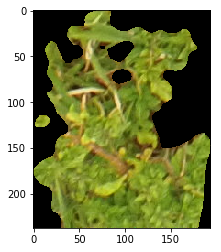

In [0]:
plt.imshow(img)
img.shape

In [0]:
import os
labels = os.listdir("weed-detection-data/dataset/")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("weed-detection-data/dataset/"+label))))

No. of labels: 5
-----------------
dataset, 4 files
broadleaf, 1191 files
soybean, 7376 files
soil, 3249 files
grass, 3520 files


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = "weed-detection-data/dataset/"
size = 216
bs = 128

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True), 
                                  valid_pct=0.2, size=size, bs=bs)

In [0]:
data.normalize()

ImageDataBunch;

Train: LabelList (24538 items)
x: ImageList
Image (3, 216, 216),Image (3, 216, 216),Image (3, 216, 216),Image (3, 216, 216),Image (3, 216, 216)
y: CategoryList
broadleaf,broadleaf,broadleaf,broadleaf,broadleaf
Path: weed-detection-data/dataset;

Valid: LabelList (6134 items)
x: ImageList
Image (3, 216, 216),Image (3, 216, 216),Image (3, 216, 216),Image (3, 216, 216),Image (3, 216, 216)
y: CategoryList
soybean,soybean,soybean,grass,broadleaf
Path: weed-detection-data/dataset;

Test: None

In [0]:
print(data.classes)
len(data.classes),data.c

['broadleaf', 'grass', 'soil', 'soybean']


(4, 4)

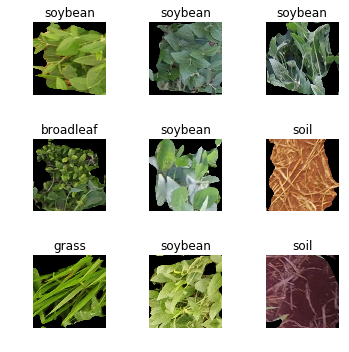

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learner = create_cnn(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 63.2MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


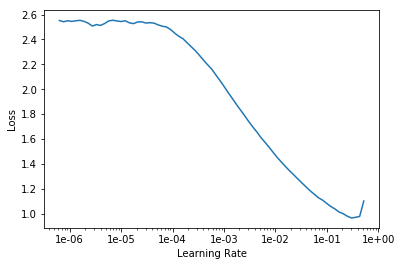

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.080813,0.017296,0.994620,04:45
1,0.039990,0.010309,0.996903,04:43
2,0.034081,0.010324,0.996903,04:44
3,0.020729,0.009459,0.997229,04:43
4,0.018421,0.004109,0.998859,04:47
5,0.007860,0.003424,0.999022,04:47
6,0.003910,0.002137,0.999348,04:45
7,0.006263,0.001265,0.999348,04:36


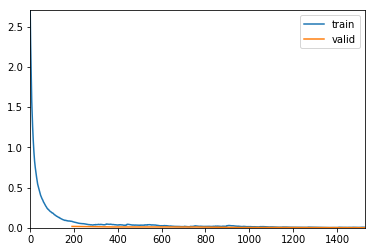

In [0]:
learner.fit_one_cycle(8, max_lr=slice(1e-3, 1e-2))

In [0]:
interpreter = ClassificationInterpretation.from_learner(learner)

In [0]:
interpreter.most_confused(min_val=2)

[('grass', 'soybean', 2)]

In [0]:
learner.save('stage-1')
#learner.load('stage-1')

In [0]:
#learner.unfreeze()

In [0]:
#learner.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))